In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Loading

In [2]:
features_dir = '../data/dengue_features_train.csv'
labels_dir = '../data/dengue_labels_train.csv'

In [3]:
features = pd.read_csv('../data/dengue_features_train.csv')
labels = pd.read_csv('../data/dengue_labels_train.csv')
features

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,45.00,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,207.10,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,50.60,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,62.33,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0


In [4]:
labels

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
...,...,...,...,...
1451,iq,2010,21,5
1452,iq,2010,22,8
1453,iq,2010,23,1
1454,iq,2010,24,1


In [5]:
data = features.merge(labels)

In [6]:
data

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


# Exploration

In [7]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   city                                   1456 non-null   object 
 1   year                                   1456 non-null   int64  
 2   weekofyear                             1456 non-null   int64  
 3   week_start_date                        1456 non-null   object 
 4   ndvi_ne                                1262 non-null   float64
 5   ndvi_nw                                1404 non-null   float64
 6   ndvi_se                                1434 non-null   float64
 7   ndvi_sw                                1434 non-null   float64
 8   precipitation_amt_mm                   1443 non-null   float64
 9   reanalysis_air_temp_k                  1446 non-null   float64
 10  reanalysis_avg_temp_k                  1446 non-null   float64
 11  rean

In [8]:
features.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [9]:
#perc_nan_feat = features.isnull().sum()/features.shape[0] * 100

#print("{:.2f}% of the rows have NaNs in one or more columns.".format(perc_nan_feat))

In [10]:
labels.isnull().sum() 

city           0
year           0
weekofyear     0
total_cases    0
dtype: int64

## 2.1 Missing values per column

In [11]:
columns_with_nulls = []
for column in features.columns:
    if features.loc[:, column].isnull().any():
        columns_with_nulls.append(column)

for column in columns_with_nulls:
    percent_missing = round(((features.loc[features.loc[:, column].isnull()].shape[0] / features.shape[0]) * 100), 4)
    print("Column {} has {}% missing values \n".format(column, percent_missing))

Column ndvi_ne has 13.3242% missing values 

Column ndvi_nw has 3.5714% missing values 

Column ndvi_se has 1.511% missing values 

Column ndvi_sw has 1.511% missing values 

Column precipitation_amt_mm has 0.8929% missing values 

Column reanalysis_air_temp_k has 0.6868% missing values 

Column reanalysis_avg_temp_k has 0.6868% missing values 

Column reanalysis_dew_point_temp_k has 0.6868% missing values 

Column reanalysis_max_air_temp_k has 0.6868% missing values 

Column reanalysis_min_air_temp_k has 0.6868% missing values 

Column reanalysis_precip_amt_kg_per_m2 has 0.6868% missing values 

Column reanalysis_relative_humidity_percent has 0.6868% missing values 

Column reanalysis_sat_precip_amt_mm has 0.8929% missing values 

Column reanalysis_specific_humidity_g_per_kg has 0.6868% missing values 

Column reanalysis_tdtr_k has 0.6868% missing values 

Column station_avg_temp_c has 2.9533% missing values 

Column station_diur_temp_rng_c has 2.9533% missing values 

Column station_

# Actions:

1. Dropna first as the number of nans in features in small

In [12]:
data_clean = data.dropna()
data_clean

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


In [13]:
print("Droped {:.2f}% of rows.".format((1 - data_clean.shape[0]/data.shape[0])*100))

Droped 17.65% of rows.


### Action:
- Come back to impute these values if performance improvement is needed.

## 2.2 Target distribution

In [14]:
labels[labels['city']=='sj']

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
...,...,...,...,...
931,sj,2008,13,4
932,sj,2008,14,3
933,sj,2008,15,1
934,sj,2008,16,3


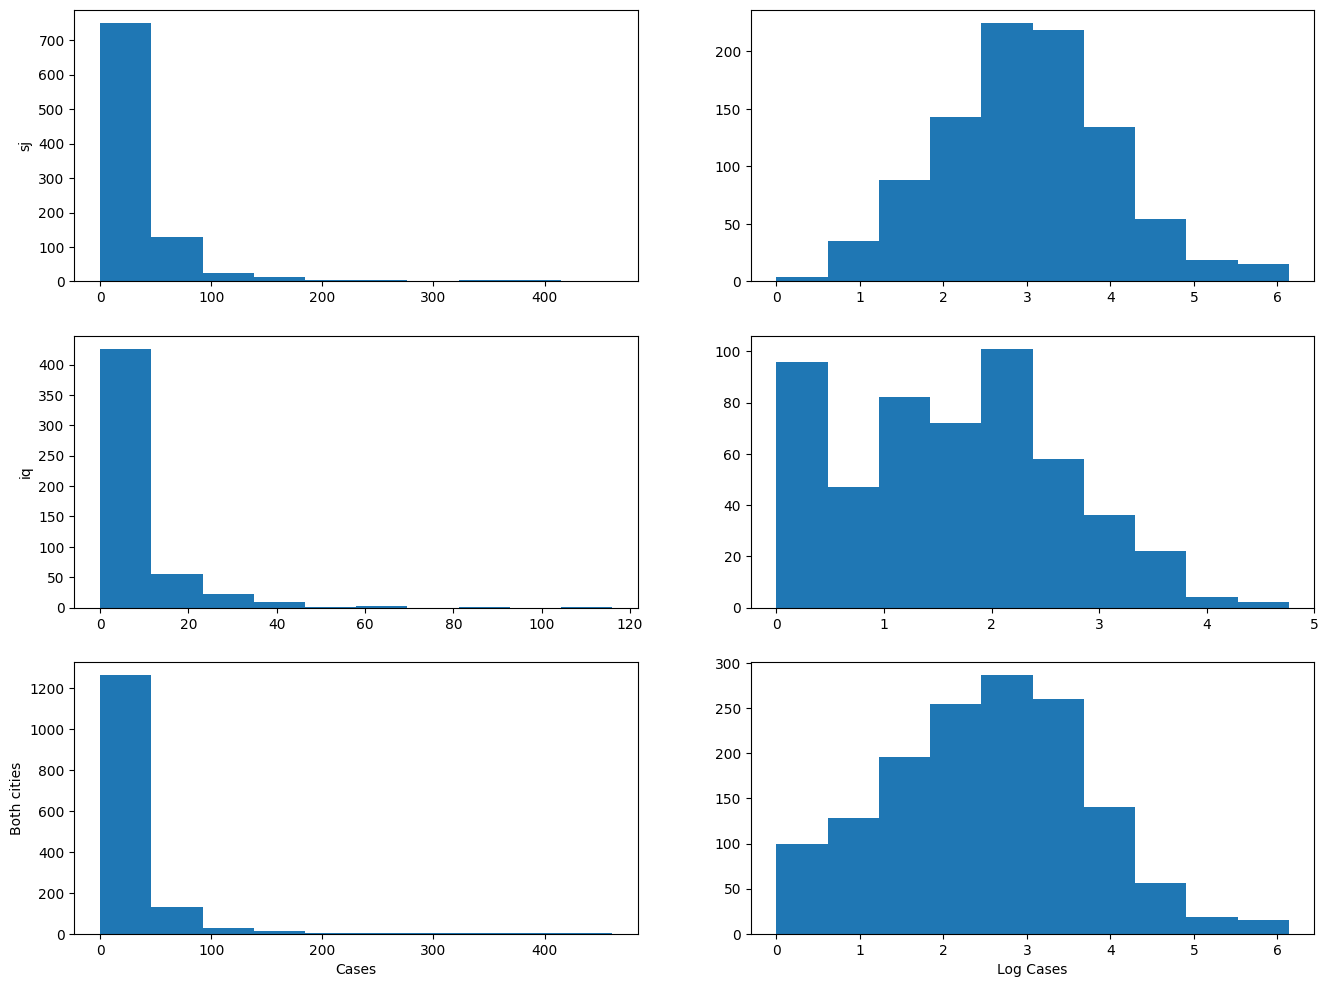

In [15]:
cities = ['sj', 'iq']

fig, axs= plt.subplots(3,2, figsize=(16,12))

for i in range(2):
    axs[i, 0].hist(labels[labels['city']==cities[i]]['total_cases'])
    axs[i, 1].hist(np.log1p(labels[labels['city']==cities[i]]['total_cases']))

    
    axs[i,0].set_ylabel(str(cities[i]))
    #axs[i,1].set_ylabel(str(cities[i]))
    
    

axs[2, 0].hist(labels['total_cases'])
axs[2, 1].hist(np.log1p(labels['total_cases']))  
axs[2,0].set_ylabel("Both cities")  

axs[2, 1].set_xlabel('Log Cases')
axs[2, 0].set_xlabel('Cases')

    #axs[i, 0].set_title('Total cases in city {}'.format(cities[i]))
    #axs[i, 1].set_title('Log of total cases in city {}'.format(cities[i]))

plt.show()


### Actions:
1. Separate the data by cities (perhaps during the 2nd iteration)
2. Take log of cases

In [16]:
data_clean.loc[:,'log_total_cases'] = np.log1p(data_clean['total_cases'])
data_clean.head()

/tmp/ipykernel_44146/3331905263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean.loc[:,'log_total_cases'] = np.log1p(data_clean['total_cases'])


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,log_total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,1.609438
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,1.791759
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,1.609438
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,1.386294
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,1.945910


In [17]:
y = data_clean['log_total_cases']
X = data_clean.drop(columns=['total_cases','log_total_cases'])
X.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [18]:
y.head()

0    1.609438
1    1.791759
2    1.609438
3    1.386294
4    1.945910
Name: log_total_cases, dtype: float64

### Feature ideas:


- Improve on the dropna
- Split "week_start_date" into different features to account for monthly and daily seasonality

## Feature selection

In [19]:
num_feat = data_clean.select_dtypes(include=[np.number])

num_feat.head()        

,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,...,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,log_total_cases
0,1990,18,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,...,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,1.609438
1,1990,19,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,...,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,1.791759
2,1990,20,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,...,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,1.609438
3,1990,21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,...,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,1.386294
4,1990,22,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,...,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,1.945910


array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'weekofyear'}>,
        <Axes: title={'center': 'ndvi_ne'}>,
        <Axes: title={'center': 'ndvi_nw'}>,
        <Axes: title={'center': 'ndvi_se'}>],
       [<Axes: title={'center': 'ndvi_sw'}>,
        <Axes: title={'center': 'precipitation_amt_mm'}>,
        <Axes: title={'center': 'reanalysis_air_temp_k'}>,
        <Axes: title={'center': 'reanalysis_avg_temp_k'}>,
        <Axes: title={'center': 'reanalysis_dew_point_temp_k'}>],
       [<Axes: title={'center': 'reanalysis_max_air_temp_k'}>,
        <Axes: title={'center': 'reanalysis_min_air_temp_k'}>,
        <Axes: title={'center': 'reanalysis_precip_amt_kg_per_m2'}>,
        <Axes: title={'center': 'reanalysis_relative_humidity_percent'}>,
        <Axes: title={'center': 'reanalysis_sat_precip_amt_mm'}>],
       [<Axes: title={'center': 'reanalysis_specific_humidity_g_per_kg'}>,
        <Axes: title={'center': 'reanalysis_tdtr_k'}>,
        <Axes: title=

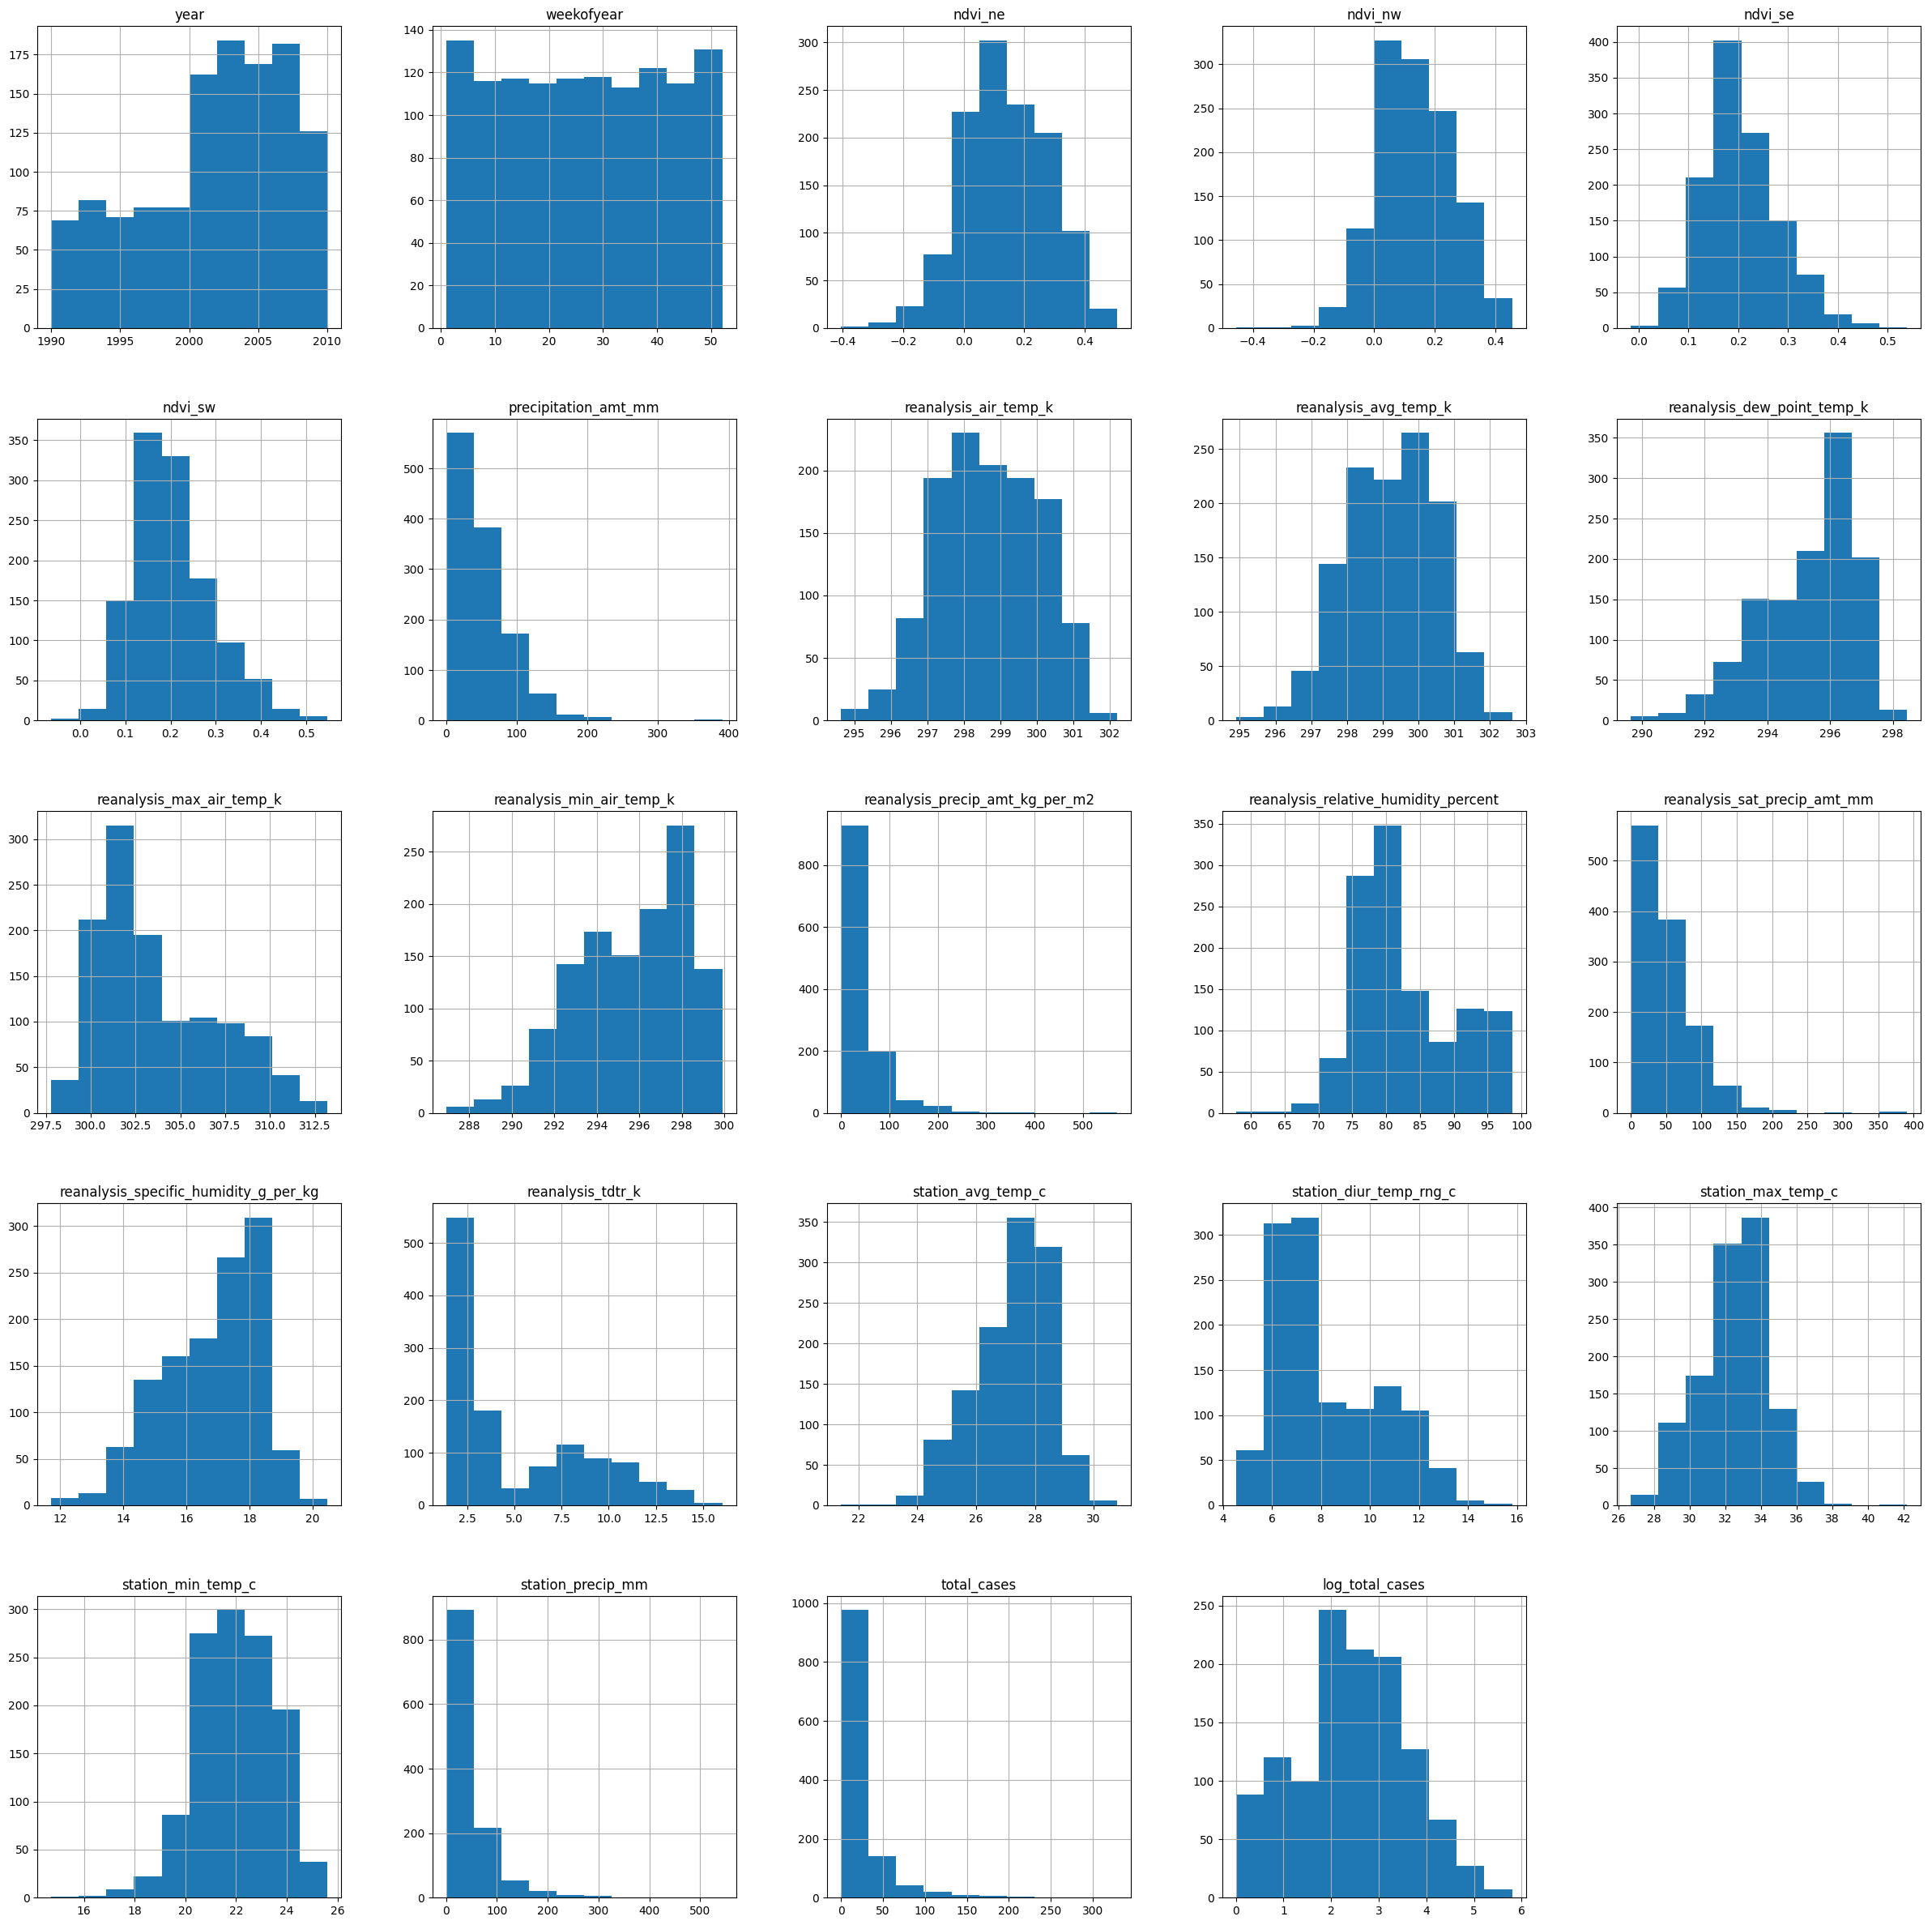

In [20]:
hist_distr = num_feat.hist(figsize = (30, 30))
hist_distr

In [21]:
num_feat = data_clean.select_dtypes(include=[np.number])

correlation_matrix = num_feat.corr()

cm = np.abs(correlation_matrix[['log_total_cases']]).sort_values(['log_total_cases'], ascending = False)
cm

,log_total_cases
log_total_cases,1.000000
total_cases,0.758503
reanalysis_min_air_temp_k,0.575846
reanalysis_tdtr_k,0.550280
station_diur_temp_rng_c,0.488358
reanalysis_max_air_temp_k,0.449328
station_min_temp_c,0.404177
reanalysis_air_temp_k,0.389485
ndvi_ne,0.383553
year,0.380462


### Actions:
1. For the start choose 5 most correlated features.

In [22]:
ordered_num_features = cm.index[2:].to_list()
ordered_num_features

['reanalysis_min_air_temp_k',
 'reanalysis_tdtr_k',
 'station_diur_temp_rng_c',
 'reanalysis_max_air_temp_k',
 'station_min_temp_c',
 'reanalysis_air_temp_k',
 'ndvi_ne',
 'year',
 'ndvi_nw',
 'ndvi_sw',
 'ndvi_se',
 'station_max_temp_c',
 'reanalysis_relative_humidity_percent',
 'reanalysis_dew_point_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_specific_humidity_g_per_kg',
 'station_precip_mm',
 'weekofyear',
 'precipitation_amt_mm',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_precip_amt_kg_per_m2',
 'station_avg_temp_c']

In [23]:
numerical_selected = ordered_num_features[:10]
numerical_selected

['reanalysis_min_air_temp_k',
 'reanalysis_tdtr_k',
 'station_diur_temp_rng_c',
 'reanalysis_max_air_temp_k',
 'station_min_temp_c',
 'reanalysis_air_temp_k',
 'ndvi_ne',
 'year',
 'ndvi_nw',
 'ndvi_sw']

In [24]:
cat_feat = data_clean.select_dtypes(include=[object])
cat_feat

,city,week_start_date
0,sj,1990-04-30
1,sj,1990-05-07
2,sj,1990-05-14
3,sj,1990-05-21
4,sj,1990-05-28
...,...,...
1451,iq,2010-05-28
1452,iq,2010-06-04
1453,iq,2010-06-11
1454,iq,2010-06-18


### Actions:
1. Change the week_start_date type to datetime
2. One-hot encode the city

In [25]:
X['week_start_date'] = pd.to_datetime(X['week_start_date'], format='%Y-%m-%d')
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1199 entries, 0 to 1455
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   city                                   1199 non-null   object        
 1   year                                   1199 non-null   int64         
 2   weekofyear                             1199 non-null   int64         
 3   week_start_date                        1199 non-null   datetime64[ns]
 4   ndvi_ne                                1199 non-null   float64       
 5   ndvi_nw                                1199 non-null   float64       
 6   ndvi_se                                1199 non-null   float64       
 7   ndvi_sw                                1199 non-null   float64       
 8   precipitation_amt_mm                   1199 non-null   float64       
 9   reanalysis_air_temp_k                  1199 non-null   float64      

## 3. Building the pipeline

In [26]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error

In [27]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, shuffle=False)

numerical_cols = numerical_selected
categorical_cols = ['city']

my_cols = categorical_cols + numerical_cols +['week_start_date']

X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [28]:
numerical_transformer = Pipeline( steps =[
    ('imputer', SimpleImputer()),
    ('scalar', StandardScaler()),
    ('normalizer', Normalizer())
])
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder())
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [29]:
model_1 =  LinearRegression()

my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model_1)
                             ])

In [30]:
my_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scalar',
                                                                   StandardScaler()),
                                                                  ('normalizer',
                                                                   Normalizer())]),
                                                  ['reanalysis_min_air_temp_k',
                                                   'reanalysis_tdtr_k',
                                                   'station_diur_temp_rng_c',
                                                   'reanalysis_max_air_temp_k',
                                                   'station_min_temp_c',
                                                   'reanalysis_air_temp_k',
                                                   'ndvi_ne', 'year', 'ndvi_nw',
                                                   'ndvi_sw']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['city'])])),
                ('model', LinearRegression())])

In [31]:
X_valid

,city,reanalysis_min_air_temp_k,reanalysis_tdtr_k,station_diur_temp_rng_c,reanalysis_max_air_temp_k,station_min_temp_c,reanalysis_air_temp_k,ndvi_ne,year,ndvi_nw,ndvi_sw,week_start_date
1187,iq,294.1,6.642857,9.100000,303.9,23.7,297.927143,0.214100,2005,0.231533,0.201771,2005-04-30
1188,iq,293.3,6.100000,7.500000,304.8,21.0,297.330000,0.146533,2005,0.134583,0.188057,2005-05-07
1189,iq,293.6,9.271429,11.600000,306.7,21.0,298.684286,0.248433,2005,0.234100,0.193067,2005-05-14
1191,iq,294.0,10.942857,8.700000,308.1,22.4,299.005714,0.311814,2005,0.358543,0.247457,2005-05-28
1193,iq,293.7,7.171429,9.166667,303.9,22.0,297.304286,0.139514,2005,0.140100,0.118543,2005-06-11
...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,294.5,9.800000,11.933333,309.7,22.4,299.334286,0.342750,2010,0.318900,0.292514,2010-05-28
1452,iq,291.9,7.471429,10.500000,308.5,21.7,298.330000,0.160157,2010,0.160371,0.225657,2010-06-04
1453,iq,292.4,7.500000,6.900000,305.5,19.2,296.598571,0.247057,2010,0.146057,0.233714,2010-06-11
1454,iq,291.9,7.871429,8.733333,306.1,21.0,296.345714,0.333914,2010,0.245771,0.325486,2010-06-18


In [32]:
X_valid['week_start_date'] = pd.to_datetime(X_valid['week_start_date'], format='%Y-%m-%d')

In [33]:
preds = my_pipeline.predict(X_valid)

In [34]:
preds = my_pipeline.predict(X_valid)
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)


MAE: 0.9332060350631444


In [35]:
test_df = pd.read_csv('../data/dengue_features_test.csv')
test_df

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.018900,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.018000,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.001500,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.056800,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,iq,2013,22,2013-05-28,0.301471,0.380029,0.280629,0.383186,41.12,297.774286,...,67.60,89.990000,41.12,17.185714,10.100000,27.400000,9.050000,32.6,21.8,33.0
412,iq,2013,23,2013-06-04,0.247600,0.296343,0.285371,0.350357,71.52,297.167143,...,45.70,93.891429,71.52,17.448571,9.657143,27.520000,10.720000,33.8,21.4,68.0
413,iq,2013,24,2013-06-11,0.238729,0.251029,0.252586,0.249771,78.96,295.831429,...,45.22,94.967143,78.96,16.410000,7.385714,27.200000,10.075000,32.6,21.6,93.2
414,iq,2013,25,2013-06-18,0.310429,0.302700,0.406614,0.403943,39.54,295.778571,...,4.70,89.057143,39.54,15.137143,8.228571,26.700000,8.480000,32.2,21.8,34.1


In [36]:
test_df['week_start_date'] = pd.to_datetime(test_df['week_start_date'], format='%Y-%m-%d')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   city                                   416 non-null    object        
 1   year                                   416 non-null    int64         
 2   weekofyear                             416 non-null    int64         
 3   week_start_date                        416 non-null    datetime64[ns]
 4   ndvi_ne                                373 non-null    float64       
 5   ndvi_nw                                405 non-null    float64       
 6   ndvi_se                                415 non-null    float64       
 7   ndvi_sw                                415 non-null    float64       
 8   precipitation_amt_mm                   414 non-null    float64       
 9   reanalysis_air_temp_k                  414 non-null    float64   

In [37]:
#print("Deleted {} % of the initial data".format((1 - clean_test_df.shape[0]/test_df.shape[0])*100))

In [38]:
result = np.round(np.expm1(my_pipeline.predict(test_df))).astype(int)

In [39]:
result

array([10, 11,  9, 12, 11, 13, 12, 14, 14, 15, 14, 14, 15, 16, 14, 17, 14,
       16, 16, 19, 16, 16, 16, 15, 16, 15, 13, 16, 15, 12, 12, 10,  8,  8,
        8, 11,  8,  8,  8,  7,  8,  7,  9,  8,  7, 10,  7,  8,  7,  8,  6,
        8,  9,  9, 10,  9,  9, 11, 11, 12, 12, 12, 14, 14, 14, 14, 15, 14,
       13, 16, 17, 16, 15, 14, 17, 16, 16, 16, 12, 13, 13, 14, 11, 11, 13,
       11, 12,  9,  9, 10, 10,  8,  8,  9,  8, 13,  9, 12, 12, 11, 11, 11,
        8, 12, 15, 13, 12, 13, 11, 14, 15, 14, 15, 15, 15, 15, 14, 14, 14,
       17, 16, 16, 17, 17, 15, 15, 14, 14, 15, 12, 14, 14, 12, 13, 11,  9,
        7, 10, 11,  9,  9,  9,  9,  9,  8,  8,  7,  8,  7,  8,  8,  6,  8,
        7,  7,  7, 10, 10,  9,  8, 10, 12, 12, 11, 14, 15, 13, 12, 12, 14,
       13, 13, 14, 13, 13, 13, 14, 14, 14, 15, 14, 12, 13, 12, 12, 16, 10,
       11,  9,  9,  8,  8,  8, 10,  9,  7,  8,  8,  8,  9,  8,  7,  7,  7,
        8,  9,  9,  8,  9, 11,  9, 13,  9, 10, 11, 11, 13, 13, 14, 13, 14,
       13, 14, 13, 14, 15

In [40]:
Output = pd.DataFrame({'city': test_df['city'], 'year': test_df['year'], 'weekofyear': test_df['weekofyear'], 'total_cases': result}).set_index(['city','year','weekofyear'])
Output

total_cases
city year weekofyear             
sj   2008 18                   10
          19                   11
          20                    9
          21                   12
          22                   11
...                           ...
iq   2013 22                    1
          23                    1
          24                    1
          25                    2
          26                    1

[416 rows x 1 columns]

In [41]:
Output.to_csv("baseline_result.csv")

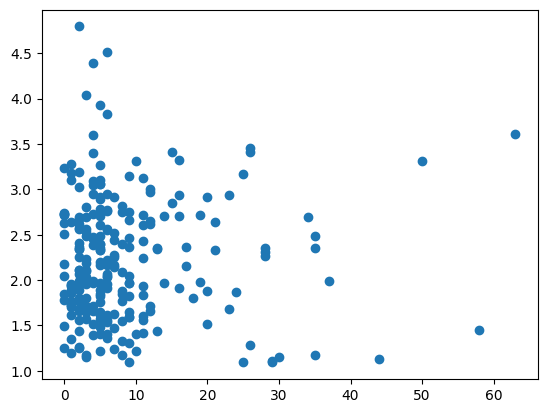

In [42]:
plt.scatter(np.expm1(y_valid), np.expm1(preds))
plt.show()

In [43]:

np.mean(np.expm1(y_valid))

np.float64(8.583333333333334)

In [44]:
np.mean(np.expm1(preds))

np.float64(2.2282879609534954)

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
def get_dt_col(X , column='week_start_date', format='%Y-%m-%d'):
    """
    Input:
        X
        col = weekofx

    Returns:
        X with X[col].dtype = datetime

    """
    X_new = X.copy()
    X_new[column] = pd.to_datetime(X_new[column], format=format)

    return X_new
    

In [47]:
def get_train_data(features_dir, labels_dir):
    """ 
    Input:
        str to csv with train features and labels

    Output:
         X, y
    
    """
    features = pd.read_csv(features_dir)
    labels = pd.read_csv(labels_dir)

    data = features.merge(labels)

    data_clean = data.dropna()
    print("Droped {:.2f}% of rows.".format((1 - data_clean.shape[0]/data.shape[0])*100))

    data_clean.loc[:,'log_total_cases'] = np.log1p(data_clean['total_cases'])
    data_clean_dt = get_dt_col(data_clean)

    y = data_clean_dt['log_total_cases']
    X = data_clean_dt.drop(columns=['total_cases','log_total_cases'])

        
    return X, y


In [48]:
def get_train_features(X, y, corr_threshold = 0.3):
    """ 
    Input:
        X
        y
        corr_threshold = 0.3

    Output:
        numerical_list, categorical_list, other_list
    """
    data = X.copy()
    data.loc[:,'log_total_cases'] = y

    num_feat = data.select_dtypes(include=[np.number])

    correlation_matrix = num_feat.corr()

    cm = np.abs(correlation_matrix[['log_total_cases']]).sort_values(['log_total_cases'], ascending = False)

    ordered_num_features = cm.index[1:].to_list()
    mask = cm>corr_threshold
    numerical_selected = ordered_num_features[0:len(mask)]

    categorical_cols = ['city']
    other_cols = ['week_start_date']

    return numerical_selected, categorical_cols, other_cols

In [49]:
features_dir = '../data/dengue_features_train.csv'
labels_dir = '../data/dengue_labels_train.csv'

corr_threshold = 0.3

X, y = get_train_data(features_dir=features_dir, labels_dir=labels_dir)

columns = get_train_features(X, y, corr_threshold = corr_threshold)


columns[0]

Droped 17.65% of rows.


/tmp/ipykernel_44146/4020219914.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean.loc[:,'log_total_cases'] = np.log1p(data_clean['total_cases'])


['reanalysis_min_air_temp_k',
 'reanalysis_tdtr_k',
 'station_diur_temp_rng_c',
 'reanalysis_max_air_temp_k',
 'station_min_temp_c',
 'reanalysis_air_temp_k',
 'ndvi_ne',
 'year',
 'ndvi_nw',
 'ndvi_sw',
 'ndvi_se',
 'station_max_temp_c',
 'reanalysis_relative_humidity_percent',
 'reanalysis_dew_point_temp_k',
 'reanalysis_avg_temp_k',
 'reanalysis_specific_humidity_g_per_kg',
 'station_precip_mm',
 'weekofyear',
 'precipitation_amt_mm',
 'reanalysis_sat_precip_amt_mm',
 'reanalysis_precip_amt_kg_per_m2',
 'station_avg_temp_c']

In [50]:
def get_trained_pipeline(X, y, columns, model, train_size=0.8, validate = True):
    """ 
    Input:
        X, y
        corr_threshold: Feature to Y correlation threshold for feature selection.

    Output:
        print statement with val mean abs error
        pipeline
        X_valid, y_valid (for later validation trials)

    """

    X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=1-train_size, shuffle=False)

    numerical_cols, categorical_cols, other_cols = columns[0], column[1], columns[2]

    my_cols = categorical_cols + numerical_cols + other_cols

    X_train = X_train_full[my_cols].copy()
    X_valid = X_valid_full[my_cols].copy()

    my_pipeline = get_pipeline(model, columns)
    print("Training in progress.")
    my_pipeline.fit(X_train, y_train)
    print("Training finished.\n")
    
    if validate:
        print("Validation error in progress.")
        preds = my_pipeline.predict(X_valid)
        score = mean_absolute_error(y_valid, preds)
        print(' Finished Validation')
        print('MAE:', score)

    return my_pipeline, X_valid, y_valid

In [51]:
def get_validation_error():
    """
    Input:
        X_valid,
        y_valid
        
    Output:
        mean_absolute_error
    """

    pass

In [52]:
def get_pipeline(model, columns):
    """ 
    Input:
        model
        
    Output:
        pipeline
    """

    numerical_cols, categorical_cols = columns[0], columns[1]

    numerical_transformer = Pipeline( steps =[
        ('imputer', SimpleImputer()),
        ('scalar', StandardScaler()),
        ('normalizer', Normalizer())
    ])
    # Preprocessing for categorical data
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder())
    ])

    # Bundle preprocessing for numerical and categorical data
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])
    
    my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])
    
    return my_pipeline

In [53]:
def get_prediction(X_test, trained_pipeline, exp=False):
    """
    Input:
        X_test
        trained_pipeline

    Output:
        prediction vector

        X_test -> apply dt_col

    """

    X = get_dt_col(X_test)
    prediction = trained_pipeline.fit(X)

    if exp:
        return np.expm1(prediction)
    else:
        return prediction

In [104]:
def get_output(X_test, predictions, indexes = ['city', 'year', 'weekofyear'], exponentiate=False, file_dir = '../data/output.csv'):
    """
    Input:
        X_test - 
        predictions - for both cities indexed as X_test requires it and 
                        with the same number of rows as X_test. 
        indexes (List(str)) - By default the columns of X_test for the required format,
                        i.e., ['city', 'year', 'weekofyear'];
        exp (bool) - to exponentiate predictions or not;
                     
        file_dir (str) - directory with the filename of the output csv file;
                         Give an empty string if saving the output is not desired.
        
    Returns:
        Output (pd.DataFrame) - Dataframe with formatted results
        csv file
    """
    # 1. Exponentiate the predictions if needed.
    if exponentiate:
        result = np.round(np.expm1(predictions)).astype(int)
    else:
        result = np.round(predictions).astype(int)

    # 2. Make the dictionary for the output dataframe format.
    out_dict = {}
    for index in indexes:
        out_dict[index] = X_test[index]

    out_dict['total_cases'] = result
    Output = pd.DataFrame.from_dict(out_dict).set_index(indexes)
    
    # 3. Save predictions in a csv file ready for submission.
    if file_dir:
        print("Saved predictions in competition file format in path {}".format(file_dir))
        Output.to_csv(file_dir)

    return Output
    

In [95]:
get_output(test_df, my_pipeline.predict(test_df), exponentiate=True, file_dir=[])

total_cases
city year weekofyear             
sj   2008 18                   10
          19                   11
          20                    9
          21                   12
          22                   11
...                           ...
iq   2013 22                    1
          23                    1
          24                    1
          25                    2
          26                    1

[416 rows x 1 columns]